# Two Pointers

The main idea is to have a L (left) pointer and a R pointer, both starting at some index of the array. Where they start depends on the problem at hand.

One common method is for `L` to start at the first index, `R` at the last index, and either increment `L` or decrement `R` depending on conditions. This repeats until `L` and `R` meet.

## Example: Check Palindrome

> Q: Check if an array is palindrome.

An palindrome is a sequence that reads the same backwards as forwards.

In [ ]:
def isPalindrome(word):
    L, R = 0, len(word) - 1
    while L < R:
        if word[L] != word[R]:
            return False
        L += 1
        R -= 1
    return True

 If we have a string `word` and start our left pointer at the index `0` and our right pointer at index `word.length - 1`, every character at every L must match with every character at R.

 Time complexity is $O(n)$.

## Example: Return indices which add up to target value

> Given a sorted input array, return the two indices of two elements which sums up to the target value. Assume there's exactly *one* solution.

The brute force approach is to iterate over every pair of integers, however this is $O(n^2)$.

Since this is a sorted array:
- start our L and R pointers at `0` and `arr.length - 1`
- calculate the sum for both of our pointers
- If the sum is too large, we can decrement out R pointer and if the sum is too small, we can increment our L pointer.

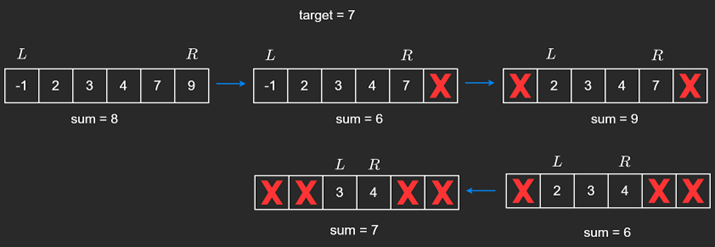

In [ ]:
def targetSum(nums, target):
    L, R = 0, len(nums) - 1
    while L < R:
        if nums[L] + nums[R] > target:
            R -= 1
        elif nums[L] + nums[R] < target:
            L += 1
        else:
            return [L, R]

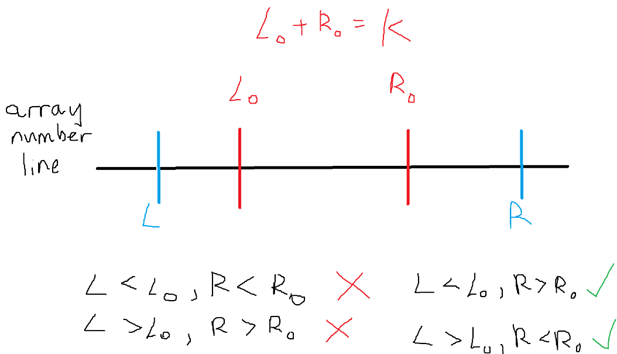

### *Why does this method guanrantee us to find the solution?*

Considering the following:
- If a given set of $L_0, R_0$ does exist satisfying $L_0 + R_0 = k$
- And if we want to find another set of $L,R$ satisfying $L + R = k$
- The we note that either $L<L_0 and R>R_0$
  - the solutions exist outside the range of $L_0,R_0$
  - if we start `L` and `R` from the extremes and bring them closer, we are guaranteed to reach this other solution first
- Or $L>L_0 and R<R_0$
  - If we start `L` and `R` from the outside and bring them in, we're guaranteed to reach $L_0, R_0$ first

If there exists multiple set of solutions $(L_0,R_0), (L_1,R_1)...$
- they must exist like nested solutions

How do we know by bringing   `L` and `R` closer together, we haven't missed a possible solution?
- For example given a possible solution $L_0 + R_0 = k$, what if the `R` went too far left beyond $R_0$, for a given $L<L_0$, and we missed the required $L_0, R_0$

If there only exists a single set of solution $(L_0,R_0)$,
- Imagine start off with $L<L_0$ and $R>R_0$
- If sum is too high, we can either decrease $L$ or $R$
  - We can see that decreasing $L$ will only lead us further from the solution
  - decreasing $R$ will lead to $R$ stopping at $R>R_0$, or the correct $R_0$, as the sum will go lower than the target and we switch strategies before we reach $R<R_0$
- same logic for $L_0$


## Time Complexity

these methods are always $O(n)$

## Problem: Remove Duplicates from Sorted Array II

Given an integer array `nums` sorted in non-decreasing order, remove some duplicates in-place such that each unique element appears at most twice. The relative order of the elements should be kept the same.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are `k` elements after removing the duplicates, then the first `k` elements of nums should hold the final result. It does not matter what you leave beyond the first `k` elements.

Return `k` after placing the final result in the first `k` slots of nums.

Do not allocate extra space for another array. You must do this by modifying the input array **in-place** with O(1) extra memory.

In [3]:
#neetcode sol
def removeDuplicates( nums):
    # Initialize an integer k that updates the kth index of the array...
    # only when the current element does not match either of the two previous indexes. ...
    k = 0
    # Traverse all elements through loop...
    for i in nums:
        print('i is' ,i)
        # If the index does not match elements, count that element and update it...
        if k < 2 or i != nums[k - 2]:
            nums[k] = i
            k += 1
            print('index k is',k)

    return k       # Return k after placing the final result in the first k slots of nums...

In [ ]:
#top solution; very similar but somehow more efficient?
def removeDuplicates(nums) -> int:
    size = len(nums)
    #this is k
    insertIndex = 2
    for i in range(2, size):
        # Found unique element

        #first condition tests if this is a new elem
        #second condition assumes its the same elem, but we only have one of it so can add one more
        if nums[i - 1] != nums[i] or nums[insertIndex-2] != nums[i]:
            # Updating insertIndex in our main array
            nums[insertIndex] = nums[i]
            # Incrementing insertIndex count by 1
            insertIndex = insertIndex + 1
    return insertIndex

*2 pointers:*

pointer `i` is for exploration and *move every step*

pointer `k` is for indicating the NEXT position to add the integer that `i` is considering, right after the `real` array

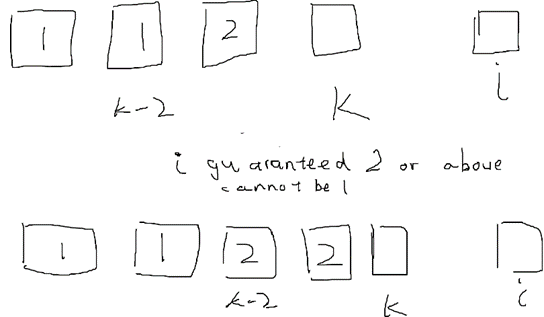

as long as `i` is different from `k-2`, we can insert it

In [7]:
print(removeDuplicates([1,1,1,1,2,2,2,3]))

i is 1
index k is 1
i is 1
index k is 2
i is 1
i is 1
i is 2
index k is 3
i is 2
index k is 4
i is 2
i is 3
index k is 5
5


## Problem: Max Water in a container

You are given an integer array `heights` where `heights[i]` represents the height of the `ith `bar.

You may choose any two bars to form a container. Return the maximum amount of water a container can store. 

Note that the area between `i` and `j` is the width * min height of the 2 bars, `(i-j)*min(heights[i],height[j])`

In [13]:
def maxArea(height) -> int:
    L,R=0,len(height)-1
    area=0

    while L<R:
        if height[R]>height[L]:
            print('L is ',L)
            L+=1
        else:
            R-=1
            print('R is',R)
        area=max(area,(R-L)*min(height[R],height[L]))
    return area

print(maxArea([1,8,6,2,5,4,8,3,7]))

L is  0
R is 7
R is 6
R is 5
R is 4
R is 3
R is 2
R is 1
49


### Proof by Elimination

We have an array of $a_1, a_2, \cdots, a_n$, without loss of generality, we assume $a_1 \leq a_n$, then $\min(a_1, a_n) = a_1$.

In the first iteration, we put the left pointer at 1, and the right pointer at index $n$.

This means that the area of container $S(1,2), S(1,3), \cdots, S(1,n) \leq S(1,n)$. This is because 
$\min(a_1, a_2), \min(a_1, a_3), \cdots, \min(a_1, a_n) \leq \min(a_1, a_n)$. Note that $\min(a_1, a_j) \leq a_1$ for $1 < j \leq n$, and $\min(a_1, a_n) = a_1$.

In the first iteration, we eliminated $n - 2$ candidates, $(1,j)$ for $1 < j < n$, for maximum container volume.

In the second iteration, the left pointer is at 2, and the right pointer is at index $n$. Without further loss of generality, we 
assume $a_2 > a_n$, then $\min(a_2, a_n) = a_n$.

This means that the area of container $S(2,n), S(3,n), \cdots, S(n-1,n) \leq S(2,n)$. This is because 
$\min(a_2, a_n), \min(a_3, a_n), \cdots, \min(a_{n-1}, a_n) \leq \min(a_2, a_n)$. Note that $\min(a_i, a_n) \leq a_n$ for $2 \leq i \leq n-1$ and $\min(a_2, a_n) = a_n$.

In the second iteration, we eliminated $n - 3$ candidates, $(i,n)$ for $1 < i < n-1$, for maximum container volume.

We iterate until the left wall and the right wall meet. This final iteration eliminates zero candidates.

The total number of iterations is $n - 1$.

Taken together, we have eliminated $(n-2) + (n-3) + \cdots + 1 + 0 = \frac{(n-1)(n-2)}{2}$ combinations and measured the area of $n-1$ 
containers. Note that $\frac{(n-1)(n-2)}{2} + (n-1)$ is exactly $\frac{n(n-1)}{2}$. There is no overlap between the eliminated candidates in each 
iteration because the eliminated candidates in each iteration would always have a unique index. In our case, in the first 
iteration, the unique index is 1 on the left, and it would not show up in the later eliminated candidates. In the second 
iteration, the unique index is $n$ on the right, and so on.

The whole proof is very simple, and it does not actually care which side of the container wall is higher or lower. Other proofs, 
which might be correct, are very likely to be brain-twisting.